# Tablas de contingentia

## 1. Preferencia deportiva por sexo

+ Un investigador desea estudiar si existe una relación significativa entre el sexo de las personas y su preferencia por dos deportes populares: fútbol y baloncesto. Para ello, selecciona una muestra de 100 personas, donde se registra el sexo (masculino o femenino) y la preferencia deportiva de cada individuo (fútbol o baloncesto).

+ Los datos recogidos se organizan en una tabla de contingencia, y el investigador realiza una prueba de independencia Chi-cuadrado para evaluar si la preferencia deportiva depende del sexo o si ambas variables son independientes.

+ Con base en los resultados de la prueba Chi-cuadrado, el investigador debe concluir si existe una asociación significativa entre el sexo y la preferencia por fútbol o baloncesto en la muestra analizada.

+ Pregunta principal: ¿Existe una relación significativa entre el sexo y la preferencia por un deporte en esta población?

In [1]:
# Importar las librerías necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

In [2]:
# Crear los datos de ejemplo (sexo y preferencia deportiva)
data = {
    'Sexo': ['Masculino'] * 30 + ['Masculino'] * 10 + ['Femenino'] * 20 + ['Femenino'] * 40,
    'Deporte': ['Fútbol'] * 30 + ['Baloncesto'] * 10 + ['Fútbol'] * 20 + ['Baloncesto'] * 40
}

# Crear un DataFrame con los datos
df = pd.DataFrame(data)
df

,Sexo,Deporte
0,Masculino,Fútbol
1,Masculino,Fútbol
2,Masculino,Fútbol
3,Masculino,Fútbol
4,Masculino,Fútbol
...,...,...
95,Femenino,Baloncesto
96,Femenino,Baloncesto
97,Femenino,Baloncesto
98,Femenino,Baloncesto


In [3]:

# Crear la tabla de contingencia
tabla_contingencia = pd.crosstab(df['Sexo'], df['Deporte'])
tabla_contingencia

Deporte,Baloncesto,Fútbol
Sexo,,
Femenino,40,20
Masculino,10,30



Resultados de la prueba Chi-cuadrado:
Chi-cuadrado: 15.041666666666668
P-valor: 0.00010516355403363114
Grados de libertad: 1
Frecuencias esperadas:
 [[30. 30.]
 [20. 20.]]


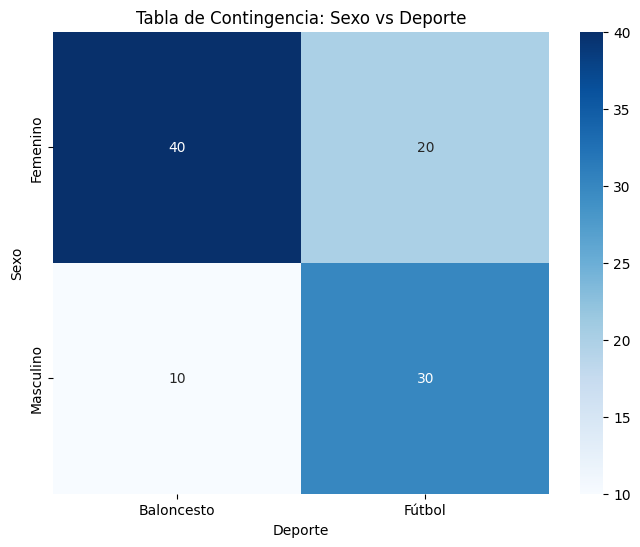

In [4]:
# Realizar la prueba de Chi-cuadrado
chi2, p, dof, expected = chi2_contingency(tabla_contingencia)

# Mostrar los resultados de la prueba Chi-cuadrado
print("\nResultados de la prueba Chi-cuadrado:")
print(f"Chi-cuadrado: {chi2}")
print(f"P-valor: {p}")
print(f"Grados de libertad: {dof}")
print(f"Frecuencias esperadas:\n {expected}")

# Crear un gráfico de mapa de calor para visualizar la tabla de contingencia
plt.figure(figsize=(8, 6))
sns.heatmap(tabla_contingencia, annot=True, cmap="Blues", fmt="d")
plt.title("Tabla de Contingencia: Sexo vs Deporte")
plt.ylabel("Sexo")
plt.xlabel("Deporte")
plt.show()

**Interpretación**
1. Tabla de contingencia:
+ La tabla de contingencia refleja la distribución de la muestra de 100 personas con respecto a las dos variables categóricas:
    +  **sexo** y **preferencia deportiva** (fútbol o baloncesto).
+ Los datos observados muestran que:
    + **30 hombres** prefieren fútbol y **10 hombres** prefieren baloncesto.
    + **20 mujeres** prefieren fútbol y **40 mujeres** prefieren baloncesto.
+ Esto sugiere inicialmente que más hombres prefieren fútbol y más mujeres prefieren baloncesto, pero necesitamos una prueba estadística para evaluar si esta diferencia es significativa.

2. Prueba Chi-cuadrado:
+ El **valor de Chi-cuadrado** calculado es **15.04**, lo que indica la magnitud de la desviación entre las frecuencias observadas y las esperadas bajo la hipótesis nula de independencia.
    + El **p-valor** resultante es **0.0001**, mucho menor que el umbral común de significancia de 0.05. 
        + Esto nos permite **rechazar la hipótesis nula**, que establece que no existe relación entre el sexo y la preferencia deportiva.
        + Los **grados de libertad** son 1, ya que cada variable tiene 2 niveles. 
    + Las **frecuencias esperadas** asumen que no hay relación entre las variables:
    + Para las mujeres, se esperarían 30 personas en cada categoría (fútbol y baloncesto).
    + Para los hombres, se esperarían también 20 personas en cada categoría. 
+   Sin embargo, las frecuencias observadas difieren notablemente de las esperadas, lo que sugiere una **asociación significativa** entre el sexo y la preferencia deportiva.

3. Mapa de calor:
+ El gráfico muestra de manera visual las frecuencias observadas para cada combinación de sexo y preferencia deportiva.
+ Los valores en cada celda corresponden a las frecuencias absolutas: el número de personas en cada categoría.
+ El color azul más oscuro indica frecuencias más altas. 
    + En este caso, las **mujeres que prefieren baloncesto** (40) es el grupo más numeroso, seguido de los **hombres que prefieren fútbol** (30).
+ La diferencia visual es evidente: hay una clara tendencia de **los hombres hacia el fútbol** y **las mujeres hacia el baloncesto**, 
    + lo que refuerza la interpretación de los resultados de la prueba estadística.

**Resumen:**
+ La prueba Chi-cuadrado y el mapa de calor nos permiten concluir que **existe una relación significativa entre el sexo y la preferencia por deportes** en esta muestra. 
+ En términos más simples, las preferencias deportivas no son independientes del sexo: 
    + los hombres tienden a preferir el fútbol, mientras que las mujeres muestran una mayor preferencia por el baloncesto.

__________________________________________________________________________________________________________________________________________

## 2. Cascos de motocicleta
+ Los datos de la tabla corresponden a un estudio retrospectivo (o de casos y controles). 
+ La variable de renglón tiene dos categorías: controles y casos. 
+ Los sujetos del grupo de control eran motociclistas elegidos al azar en ciertos lugares de la carretera. 
+ Los sujetos del grupo de casos eran motociclistas gravemente heridos o fallecidos. La variable de columna se utiliza para el color del casco que usaban. 
+ La pregunta importante es la siguiente: ¿El color del casco del motociclista se relaciona de alguna forma con el riesgo de lesiones relacionadas con choques? 
+ (Los datos se basan en “Motorcycle Rider Conspicuity and Crash Related Injury: Case-Control Study”, de Wells et al., BMJ USA, vol. 4).

In [15]:
# Datos de frecuencias
data = {
    'Casco Claro': [50, 20],  # Frecuencias para Controles y Casos
    'Casco Oscuro': [30, 40],
    'Otros colores': [20, 10]
}

# Crear el DataFrame
df = pd.DataFrame(data, index=['Controles', 'Casos'])

df

,Casco Claro,Casco Oscuro,Otros colores
Controles,50,30,20
Casos,20,40,10


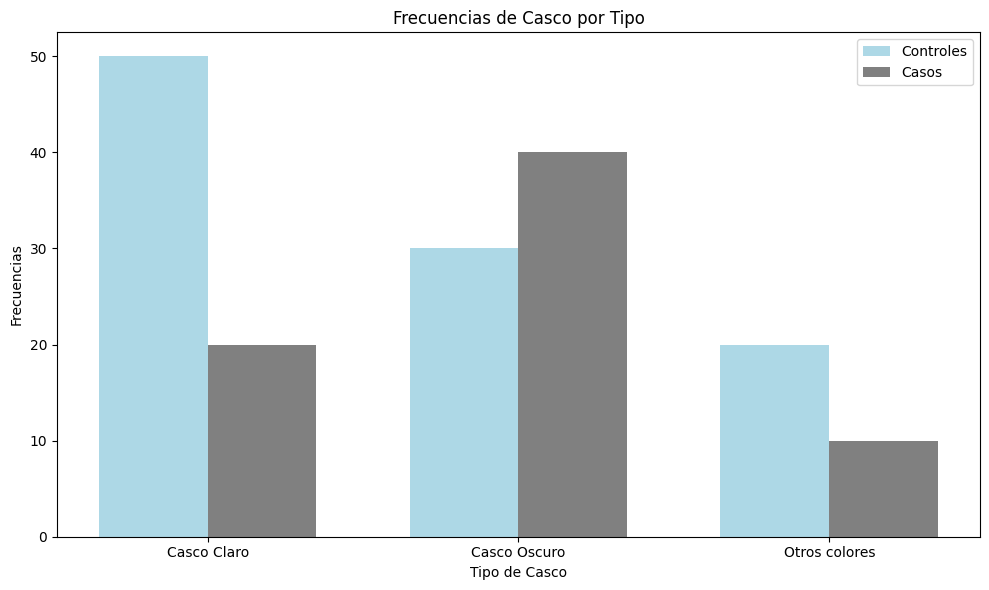

In [17]:
# Configuración del gráfico
bar_width = 0.35
index = np.arange(len(df.columns))

# Crear el gráfico de barras
fig, ax = plt.subplots(figsize=(10, 6))

# Graficar las barras para controles y casos
ax.bar(index - bar_width/2, df.loc['Controles'], bar_width, label='Controles', color='lightblue')
ax.bar(index + bar_width/2, df.loc['Casos'], bar_width, label='Casos', color='gray')

# Etiquetas y título
ax.set_xlabel('Tipo de Casco')
ax.set_ylabel('Frecuencias')
ax.set_title('Frecuencias de Casco por Tipo')
ax.set_xticks(index)
ax.set_xticklabels(df.columns)
ax.legend()

# Mostrar el gráfico
plt.tight_layout()
plt.show()

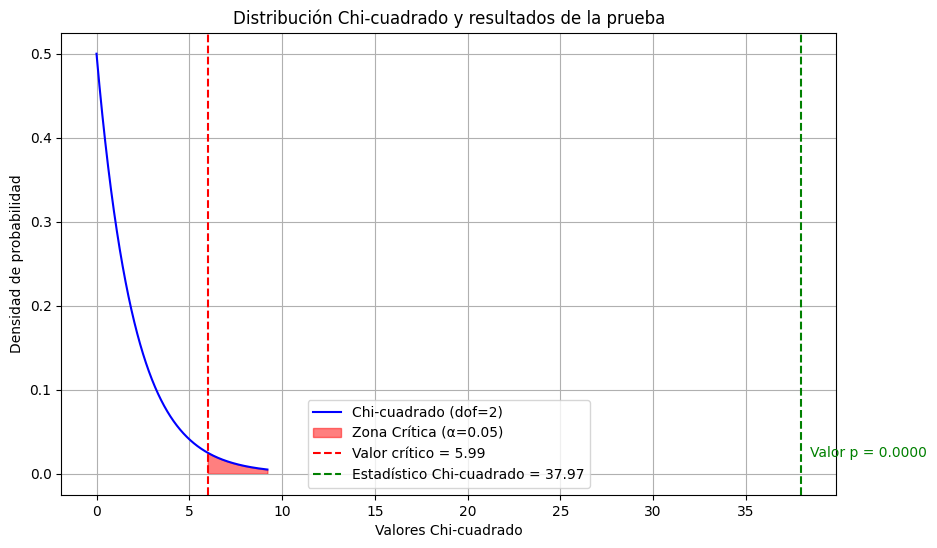

Chi-cuadrado: <scipy.stats._continuous_distns.chi2_gen object at 0x0000028C2DF9E210>
Valor p: 0.00010516355403363114
Grados de libertad: 2
Frecuencias esperadas:
[[190.54054054 171.48648649 107.97297297]
 [109.45945946  98.51351351  62.02702703]]


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2, chi2_contingency

# Datos observados de la tabla de contingencia
observed = np.array([[230, 150, 90], 
                     [70, 120, 80]])

# Realizar la prueba Chi-cuadrado
chi2_stat, p_val, dof, expected = chi2_contingency(observed)

# Parámetros
alpha = 0.05
chi2_critical = chi2.ppf(1 - alpha, dof)  # Valor crítico para el nivel de significancia
x_vals = np.linspace(0, chi2.ppf(0.99, dof), 1000)  # Valores de Chi-cuadrado para graficar

# Gráfico
plt.figure(figsize=(10, 6))

# Graficar la distribución Chi-cuadrado con los grados de libertad obtenidos
plt.plot(x_vals, chi2.pdf(x_vals, dof), label=f'Chi-cuadrado (dof={dof})', color='blue')

# Rellenar la zona crítica
plt.fill_between(x_vals, 0, chi2.pdf(x_vals, dof), where=(x_vals >= chi2_critical), 
                 color='red', alpha=0.5, label=f'Zona Crítica (α={alpha})')

# Marcar el valor crítico
plt.axvline(chi2_critical, color='red', linestyle='--', label=f'Valor crítico = {chi2_critical:.2f}')

# Marcar el estadístico Chi-cuadrado calculado
plt.axvline(chi2_stat, color='green', linestyle='--', label=f'Estadístico Chi-cuadrado = {chi2_stat:.2f}')

# Etiquetas y título
plt.title('Distribución Chi-cuadrado y resultados de la prueba')
plt.xlabel('Valores Chi-cuadrado')
plt.ylabel('Densidad de probabilidad')
plt.legend()

# Mostrar el valor p en el gráfico
plt.text(chi2_stat + 0.5, 0.02, f'Valor p = {p_val:.4f}', color='green')

# Mostrar el gráfico
plt.grid(True)
plt.show()

# Mostrar resultados
print(f"Chi-cuadrado: {chi2}")
print(f"Valor p: {p}")
print(f"Grados de libertad: {dof}")
print("Frecuencias esperadas:")
print(expected)


**Observaciones e interpretación**
1. Casco Claro: Parece que los motociclistas que usan cascos claros tienen menos probabilidades de estar involucrados en accidentes graves o fatales (dado que la frecuencia en el grupo "Casos" es menor). 
    + Esto sugiere que el uso de cascos claros puede estar asociado con una mayor visibilidad, lo que podría reducir el riesgo de lesiones graves.
2. Casco Oscuro: El mayor número de "Casos" usando cascos oscuros sugiere una posible relación entre el uso de cascos oscuros y un mayor riesgo de accidentes graves o fatales. 
    + Los cascos oscuros pueden hacer a los motociclistas menos visibles para otros conductores, aumentando el riesgo.
3. Otros colores: Las diferencias no parecen tan significativas para esta categoría.

**Conclusión:**
+ La prueba estadística muestra que hay una relación significativa entre el color del casco y el riesgo de lesiones. 
+ Específicamente, el uso de cascos claros podría estar asociado con una mayor seguridad, 
+ mientras que el uso de cascos oscuros podría estar relacionado con un mayor riesgo de lesiones graves o fatales en accidentes de motocicleta.

+ Recomendación: En función de estos resultados, se podría recomendar a los motociclistas utilizar cascos claros para mejorar su visibilidad 
    + y reducir el riesgo de accidentes graves.

________________________________________________________________________________________________________________________

## 3. Influencia de género
+ ¿Tiene efecto el género del encuestador en las respuestas de encuesta de varones? 
+ En un artículo del U.S. News & World Report acerca de encuestas se afirmó que “en temas sensibles, las personas tienden a dar respuestas ‘aceptables’ 
    + en vez de respuestas honestas; sus respuestas podrían depender del género o el origen étnico del entrevistador”. 
+ Para sustentar esta aseveración, el Eagleton Institute proporcionó los datos de una encuesta en la cual se preguntó a hombres si estaban de acuerdo con esta afirmación:      
+ “El aborto es un asunto privado que la mujer debe decidir sin intervención gubernamental”. 
+ Analizaremos el efecto del género sólo en los hombres encuestados. 
    + La tabla está basada en estas respuestas de hombres encuestados. 
+ Suponga que la encuesta se diseñó de manera que los entrevistadores varones recibieron instrucciones para obtener 800 respuestas de sujetos varones, 
    + y las entrevistadoras mujeres recibieron instrucciones para obtener 400 respuestas de sujetos varones. 

In [19]:
import pandas as pd

# Crear DataFrame con los datos observados
data = {'De acuerdo': [560, 308],
        'En desacuerdo': [240, 92]}

observed_df = pd.DataFrame(data, index=['Entrevistador Hombre', 'Entrevistador Mujer'])
observed_df


,De acuerdo,En desacuerdo
Entrevistador Hombre,560,240
Entrevistador Mujer,308,92


In [20]:
import scipy.stats as stats

# Realizar prueba Chi-cuadrado
chi2_stat, p_val, dof, expected = stats.chi2_contingency(observed_df)

# Valor crítico para alpha = 0.05 y 1 grado de libertad
alpha = 0.05
critical_value = stats.chi2.ppf(1 - alpha, dof)

# Resultados
print(f"Estadístico Chi-cuadrado: {chi2_stat:.3f}")
print(f"Valor p: {p_val:.3f}")
print(f"Grados de libertad: {dof}")
print(f"Valor crítico: {critical_value:.3f}")
print("Frecuencias esperadas:\n", pd.DataFrame(expected, index=observed_df.index, columns=observed_df.columns))


Estadístico Chi-cuadrado: 6.184
Valor p: 0.013
Grados de libertad: 1
Valor crítico: 3.841
Frecuencias esperadas:
                       De acuerdo  En desacuerdo
Entrevistador Hombre  578.666667     221.333333
Entrevistador Mujer   289.333333     110.666667


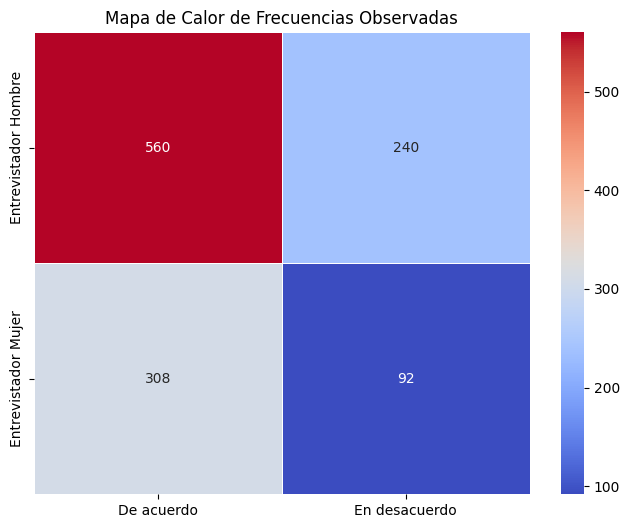

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Mapa de calor de los datos observados
plt.figure(figsize=(8, 6))
sns.heatmap(observed_df, annot=True, cmap="coolwarm", fmt='d', linewidths=0.5)
plt.title('Mapa de Calor de Frecuencias Observadas')
plt.show()


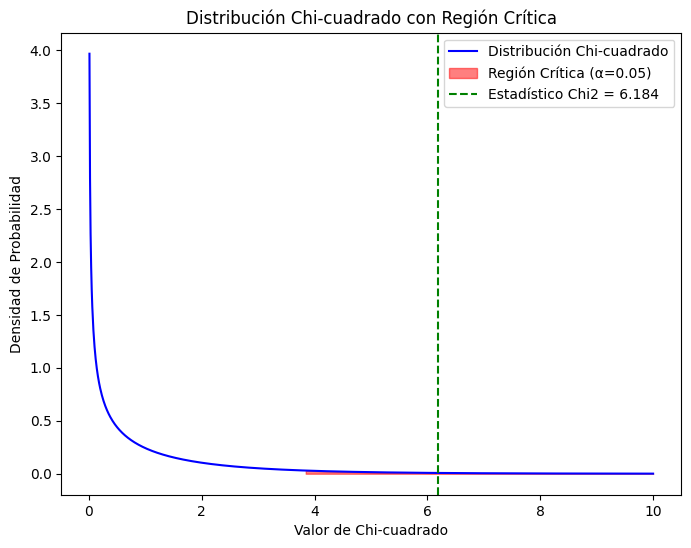

In [22]:
import numpy as np

# Gráfico de la distribución Chi-cuadrado
x = np.linspace(0, 10, 1000)
chi2_dist = stats.chi2.pdf(x, df=dof)

# Crear la figura
plt.figure(figsize=(8, 6))
plt.plot(x, chi2_dist, label="Distribución Chi-cuadrado", color='blue')

# Sombrear la región crítica
plt.fill_between(x, 0, chi2_dist, where=(x >= critical_value), color='red', alpha=0.5, label=f'Región Crítica (α={alpha})')

# Línea vertical para el estadístico Chi-cuadrado
plt.axvline(x=chi2_stat, color='green', linestyle='--', label=f'Estadístico Chi2 = {chi2_stat:.3f}')

# Etiquetas y leyenda
plt.title('Distribución Chi-cuadrado con Región Crítica')
plt.xlabel('Valor de Chi-cuadrado')
plt.ylabel('Densidad de Probabilidad')
plt.legend()
plt.show()


**Observaciones e interpretación**
1. Cálculo del estadístico Chi-cuadrado: χ2= 6.864
2. Grados de libertad: Los grados de libertad se calculan como: gl=(nfilas−1)×(ncolumnas−1)=(2−1)×(2−1)=1gl = 1
3. Valor crítico y decisión: Para un nivel de significancia α=0.05 y 1 grado de libertad, el valor crítico de χ2 es aproximadamente 3.841. 
    + Dado que χ2=6.864 es mayor que el valor crítico de 3.841, rechazamos la hipótesis nula.
4. Conclusión: Hay suficiente evidencia para concluir que las proporciones de respuestas "de acuerdo" y "en desacuerdo" no son las mismas 
    + entre los hombres encuestados por entrevistadores hombres y mujeres. 
    + Esto sugiere que el género del entrevistador sí tiene un efecto significativo en las respuestas de los encuestados varones en este caso.